In [ ]:
import pandas as pd
import nltk
from konlpy.tag import Okt; okt = Okt()
from collections import Counter


In [ ]:
data = pd.read_csv('신문기사모음.csv', encoding = 'cp949')

In [ ]:
data.head()

In [ ]:
text = data.body
text

In [ ]:
#조사, 어미, 구두점, 외국어/기호, url 제거

for i, document in enumerate(text):
    # okt = Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Foreign', 'URL']: 
            clean_words.append(word[0])
    # print(clean_words) 
    document = ' '.join(clean_words)
    # print(document) 
    text[i] = document

print(text[0])

In [ ]:
# tokenize 
tokens = []
for line in text:
    tokens.append(okt.morphs(line))
# print(tokens)

# 한글자 제거
for lst in tokens:
    for wd in lst:
        if len(wd) < 2:
            lst.remove(wd)

print(tokens[0])

['NHN', '빅풋', '한게임', '20년', '보드', '게임', '노하우', '접목', '스포츠', '예측', '게임', '한게임', '승부', '예측', '출시', '하다', '11일', '밝히다', '한게임', '승부', '측은', '게임', '재화', '활용', '하다', '스포츠', '경기', '결과', '예측', '하다', '보다', '게임', '실제', '전세계', '스포츠', '경기', '데이터', '바탕', '결과', '맞다', '경우', '배당률', '따르다', '게임', '멀다', '제공', '특히', 'NHN', '빅풋', '한게임', '보드', '게임', '개발', '서비스', '노하우', '바탕', '차별', '되다', '스포츠', '예측', '게임', '선보이다', '먼저', '축구', '야구', '농구', '대중', '인기', '스포츠', '아이스하키', '테니스', '탁구', '50', '이상', '방대하다', '종목', '제공', '하다', '선택', '넓히다', '국내', '프로', '스포츠', '아니다', '잉글랜드', '프리미어리그', 'EPL', '메이저리그', 'MLB', '미국', '프로농구', 'NBA', '오다', '같다', '글로벌', '인기', '리그', '모두', '포함', '되다', '스포츠', '예측', '항목', '승무', '핸디캡', '더', '오버', '포함', '하다', '120', '여종', '이용자', '경기', '결과', '예측', '다양하다', '항목', '선택', '하다', '전략', '게임', '즐기다', '있다', '또한', '이용자', '성향', '맞추다', '즐기다', '있다', '콘텐츠', '마련', '하다', '크로스', '하다', '경기', '여러', '항목', '조합', '하다', '있다', '높다', '수준', '예측', '가능하다', '스페셜', '전반전', '혹은', '쿼터', '결과', '제공', '하다', '빠르다', '호흡', '게임', '즐기다', '있다',

In [45]:
# 불용어 제거 remove stopwords

stopwords = ['하다', '되다', '있다', '들다', '들', '기자', '오다', '돼다', '년']

whole = []
for s in tokens:
    for w in s:
        if w not in stopwords:
            whole.append(w)

print(whole[:20])

['NHN', '빅풋', '한게임', '20년', '보드', '게임', '노하우', '접목', '스포츠', '예측', '게임', '한게임', '승부', '예측', '출시', '11일', '밝히다', '한게임', '승부', '측은']


In [46]:
# num of tokens, num of unique tokens

print(len(whole))
print(len(set(whole)))

35715
4954


In [47]:
# highest frequency

counts = Counter(whole)
# counts
freq = counts.most_common(30)
print(freq, end= " ")

[('게임', 1350), ('매출', 592), ('NHN', 356), ('대비', 319), ('증가', 258), ('규제', 244), ('사업', 211), ('출시', 208), ('이용자', 203), ('부문', 199), ('동기', 198), ('보드', 184), ('영업', 181), ('이익', 177), ('기록', 176), ('모바일', 163), ('시장', 161), ('서비스', 159), ('스포츠', 157), ('결제', 156), ('네오위즈', 155), ('보드게임', 152), ('실적', 151), ('국내', 132), ('코로나', 131), ('따르다', 129), ('성장', 127), ('19', 126), ('글로벌', 122), ('지난해', 118)] 

In [48]:
tok = nltk.Text(whole)
tok.vocab().most_common(30)

[('게임', 1350),
 ('매출', 592),
 ('NHN', 356),
 ('대비', 319),
 ('증가', 258),
 ('규제', 244),
 ('사업', 211),
 ('출시', 208),
 ('이용자', 203),
 ('부문', 199),
 ('동기', 198),
 ('보드', 184),
 ('영업', 181),
 ('이익', 177),
 ('기록', 176),
 ('모바일', 163),
 ('시장', 161),
 ('서비스', 159),
 ('스포츠', 157),
 ('결제', 156),
 ('네오위즈', 155),
 ('보드게임', 152),
 ('실적', 151),
 ('국내', 132),
 ('코로나', 131),
 ('따르다', 129),
 ('성장', 127),
 ('19', 126),
 ('글로벌', 122),
 ('지난해', 118)]

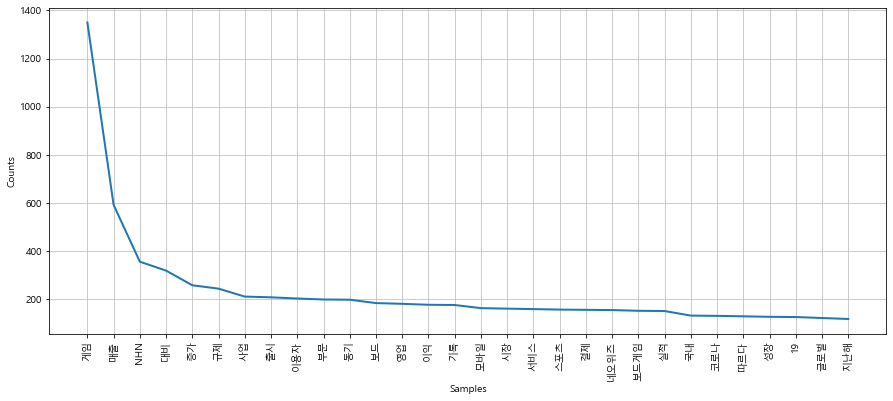

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#matplotlib.rc('font', family="NanumBarunGothic")

plt.figure(figsize=(15,6))
tok.plot(30)
plt.show()

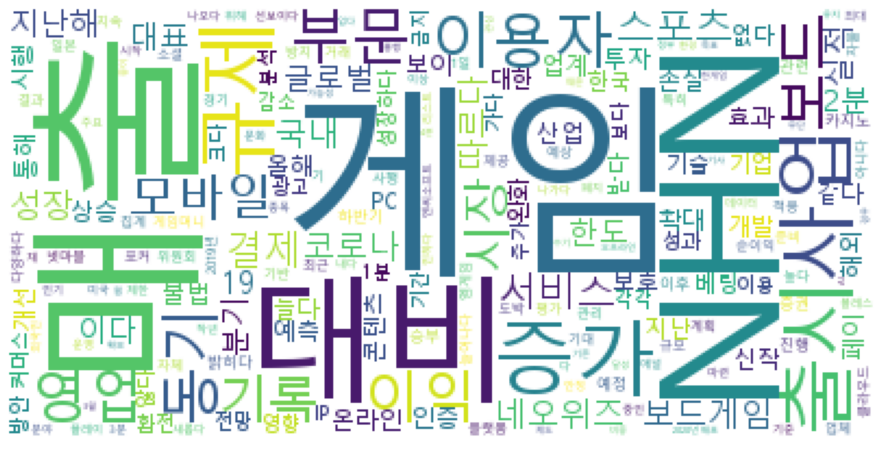

In [50]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.2, background_color='white').generate_from_frequencies(counts)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

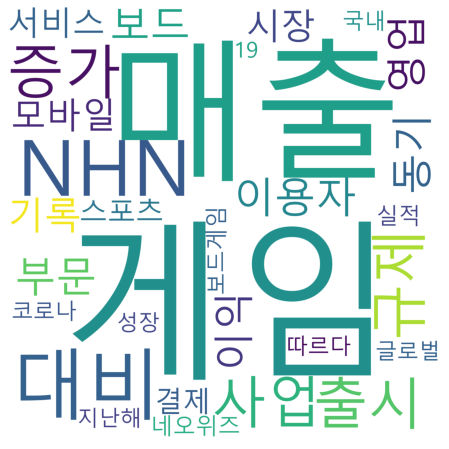

In [51]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     width = 3000, height = 3000,
                     max_words = 100).generate_from_frequencies(dict(freq))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()